In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:

import nltk

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Activation,Dropout,Conv1D, MaxPool1D
from keras.layers.embeddings import Embedding
from keras.models import load_model
from gensim.models import Word2Vec

In [63]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
train_data = pd.read_csv('df_convote_train.csv')
test_data = pd.read_csv('df_convote_test.csv')

In [78]:
y = train_data['political_party'].values
X = []

for line in train_data["text"].values:
    corpus = []
    sentences = nltk.sent_tokenize(line)
    for sent in sentences:
        sent = sent.lower()
        tokens = nltk.tokenize.word_tokenize(sent)
        filtered_words = [w.strip() for w in tokens if len(w) > 1]
        corpus.extend(filtered_words)
    X.append(corpus)

In [79]:
y_test = test_data['political_party'].values

X_test = []
for line in test_data["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(line)
    for sent in sentences:
        sent = sent.lower()
        tokens = nltk.word_tokenize(sent)
        filtered_words = [w.strip() for w in tokens if len(w) > 1]
        tmp.extend(filtered_words)
    X_test.append(tmp)

In [81]:
X_total = X


In [41]:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_total)

# X_temp = tokenizer.texts_to_sequences(X_total)
# word_index_Xtotal = tokenizer.word_index

In [82]:
import gensim

In [83]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 300

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences=X_total, size=EMBEDDING_DIM, window=5, min_count=1,sg=1)

In [84]:
len(w2v_model.wv.vocab)

25462

In [85]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index

In [86]:
maxlen = 1000 

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [87]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_total)

X_tmp = tokenizer.texts_to_sequences(X_total)
word_index_total = tokenizer.word_index

In [88]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [89]:
embedding_vectors = get_weight_matrix(w2v_model, word_index_total)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [90]:
# model = Sequential()
# #Non-trainable embeddidng layer
# model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
# #LSTM 
# model.add(LSTM(units=maxlen))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model = Sequential()
model.add(Embedding(25463, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=1000, trainable=True))
model.add(Conv1D(activation='relu', filters=4, kernel_size=4))
model.add(MaxPool1D())
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [91]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 300)         7638900   
                                                                 
 conv1d_2 (Conv1D)           (None, 997, 4)            4804      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 498, 4)           0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 128)               68096     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7,711,929
Trainable params: 7,711,929
Non-trainable params: 0
____________________________________________

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.1,random_state=42) 
history = model.fit(X_train,y_train, epochs=20)

Epoch 1/20
160/160 [==============================] - 18s 99ms/step - loss: 0.6832 - acc: 0.5583
Epoch 2/20
160/160 [==============================] - 16s 98ms/step - loss: 0.6068 - acc: 0.6673
Epoch 3/20
160/160 [==============================] - 16s 98ms/step - loss: 0.4491 - acc: 0.7786
Epoch 4/20
160/160 [==============================] - 16s 98ms/step - loss: 0.2966 - acc: 0.8606
Epoch 5/20
160/160 [==============================] - 16s 98ms/step - loss: 0.2060 - acc: 0.8969
Epoch 6/20
160/160 [==============================] - 16s 98ms/step - loss: 0.1699 - acc: 0.9138
Epoch 7/20
160/160 [==============================] - 16s 98ms/step - loss: 0.1492 - acc: 0.9215
Epoch 8/20
160/160 [==============================] - 16s 98ms/step - loss: 0.1513 - acc: 0.9183
Epoch 9/20
160/160 [==============================] - 16s 98ms/step - loss: 0.1356 - acc: 0.9268
Epoch 10/20
160/160 [==============================] - 16s 98ms/step - loss: 0.1300 - acc: 0.9295
Epoch 11/20
160/160 [========

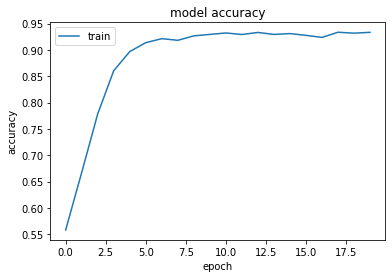

In [93]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)

X_test = tokenizer.texts_to_sequences(X_test)
word_index_test = tokenizer.word_index

In [95]:
maxlen = 1000 

#Making all news of size maxlen defined above
X_test = pad_sequences(X_test, maxlen=maxlen)

In [96]:
y_pred_val = (model.predict(X_val) >= 0.5).astype("int")
y_pred = (model.predict(X_test) >= 0.5).astype("int")

In [97]:
from sklearn.metrics import classification_report, accuracy_score
accuracy_score(y_val, y_pred_val)
#validation accuracy

0.6696113074204947

In [98]:
accuracy_score(y_test, y_pred)
#test accuracy

0.5616827743035816

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.46      0.51       868
           1       0.56      0.66      0.60       891

    accuracy                           0.56      1759
   macro avg       0.56      0.56      0.56      1759
weighted avg       0.56      0.56      0.56      1759

